In [9]:
import sys
sys.path.append("/home/zhhu/workspaces/deepinv/")

In [10]:
import random
import sys

import matplotlib
import numpy as np
import pandas as pd
import torch

from deepinv.optim.phase_retrieval import plot_error_bars

In [11]:
import matplotlib.font_manager as fm
fm._get_fontconfig_fonts.cache_clear()

In [2]:
import matplotlib.font_manager as fm

# Replace with the actual path from fc-list output
font_path = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf"
fm.fontManager.addfont(font_path)

# Verify it's been added
font_names = [f.name for f in fm.fontManager.ttflist]
print([f for f in font_names if 'times' in f.lower()])

['Times New Roman']


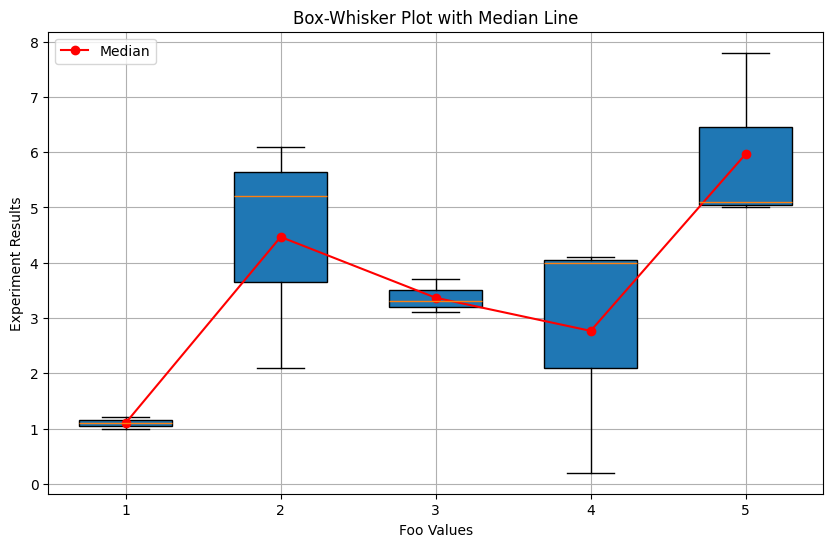

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
foo = pd.Series([1, 2, 3, 4, 5])
bar = pd.DataFrame({
    'Exp1': [1.1, 2.1, 3.7, 4.1, 5.0],
    'Exp2': [1.2, 6.1, 3.3, 0.2, 5.1],
    'Exp3': [1.0, 5.2, 3.1, 4.0, 7.8],
})

# Create the box-whisker plot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(bar.values.T, positions=foo, widths=0.6, patch_artist=True)

# Calculate the medians for each row in 'bar'
medians = bar.mean(axis=1)

# Overlay the median line plot
plt.plot(foo, medians, color='red', marker='o', linestyle='-', label='Median')

# Customize the plot
plt.xlabel('Foo Values')
plt.ylabel('Experiment Results')
plt.title('Box-Whisker Plot with Median Line')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [ ]:
# block for configuring random seed

random_seed = 50501
if random_seed is None:
    random_seed = random.randrange(2**16)
    print("No initial random seed given, generated one:", random_seed)

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

print(random.randint(1, 100))
print(np.random.randint(1, 100))
print(torch.randint(1, 100, (1,)))

91
99
tensor([35])


In [ ]:
torch.cat((torch.arange(0.1,4.1,0.1),torch.arange(4.2,9.2,0.4)))

tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000,
        3.7000, 3.8000, 3.9000, 4.0000, 4.2000, 4.6000, 5.0000, 5.4000, 5.8000,
        6.2000, 6.6000, 7.0000, 7.4000, 7.8000, 8.2000, 8.6000, 9.0000])

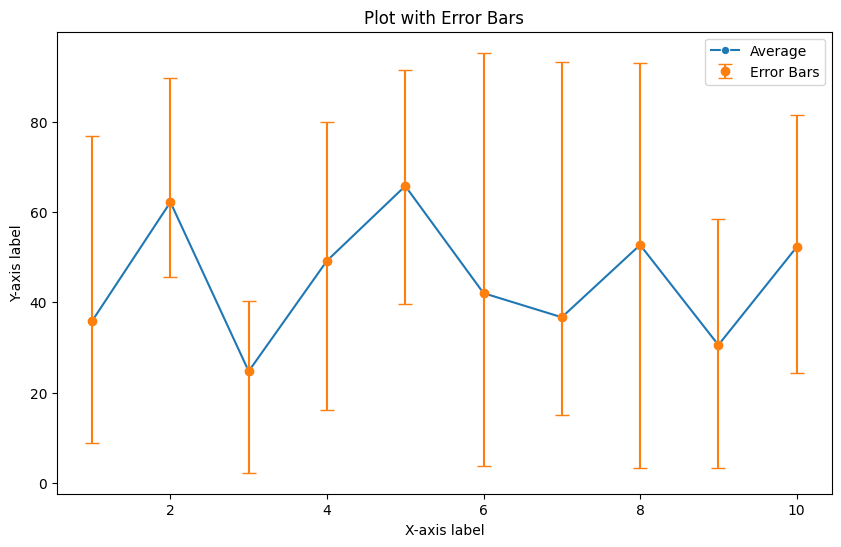

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample two-dimensional tensor
torch.manual_seed(0)
data = torch.rand(10, 5) * 100  # 10 data points, each with 5 values

# Calculate statistics
min_vals = data.min(dim=1).values.numpy()
max_vals = data.max(dim=1).values.numpy()
avg_vals = data.mean(dim=1).numpy()

# Calculate error bars
yerr_lower = avg_vals - min_vals
yerr_upper = max_vals - avg_vals

# Prepare data for plotting
df = pd.DataFrame({
    'x': range(1, len(avg_vals) + 1),
    'avg': avg_vals,
    'yerr_lower': yerr_lower,
    'yerr_upper': yerr_upper
})

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df, x='x', y='avg', marker='o', label='Average')

# Adding error bars
ax.errorbar(df['x'], df['avg'], yerr=[df['yerr_lower'], df['yerr_upper']], fmt='o', capsize=5, label='Error Bars')

# Adding labels and title
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
ax.set_title('Plot with Error Bars')
ax.legend()

# Show plot
plt.show()


In [ ]:
def plot_error_bars(oversamplings,data,title='Performance'):
    
    # Calculate statistics
    min_vals = data.min(dim=1).numpy()
    max_vals = data.max(dim=1).numpy()
    avg_vals = data.mean(dim=1).numpy()

    # Calculate error bars
    yerr_lower = avg_vals - min_vals
    yerr_upper = max_vals - avg_vals

    # Prepare data for plotting
    df = pd.DataFrame({
        'x': oversamplings,
        'avg': avg_vals,
        'yerr_lower': yerr_lower,
        'yerr_upper': yerr_upper
    })

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=df, x='x', y='avg', marker='o', label='Average')

    # Adding error bars
    ax.errorbar(df['x'], df['avg'], yerr=[df['yerr_lower'], df['yerr_upper']], fmt='o', capsize=5, label='Error Bars')

    # Adding labels and title
    ax.set_xlabel('Oversampling Ratio')
    ax.set_ylabel('Consine Similarity')
    ax.set_title(title)
    ax.legend()

    # Show plot
    plt.show()

# Understanding pandas.DataFrame

In [ ]:
df = pd.DataFrame({'oversampling': torch.arange(1.0, 3.1, 0.1), **{f'test{i}': None for i in range(100)}})

In [ ]:
for i in range(100):
    for j in range(df.shape[0]):
        df.loc[j,f'test{i}'] = torch.rand(()).numpy()

df

,oversampling,test0,test1,test2,test3,test4,test5,test6,test7,test8,...,test90,test91,test92,test93,test94,test95,test96,test97,test98,test99
0,1.0,0.6053134,0.17879152,0.70807683,0.682132,0.5370733,0.645671,0.7877872,0.6340561,0.044927895,...,0.9324739,0.3450665,0.55136615,0.21409953,0.6652837,0.7984545,0.3732348,0.32719743,0.80747527,0.411413
1,1.1,0.7781114,0.23848265,0.76488256,0.48982114,0.0063943267,0.8561675,0.299263,0.089736044,0.5925115,...,0.40891176,0.52392316,0.10672146,0.5522628,0.5365326,0.65468526,0.94249606,0.9910706,0.9312298,0.5126226
2,1.2,0.9089494,0.80469996,0.24342912,0.5433534,0.5876952,0.78651917,0.051484644,0.3064713,0.48509824,...,0.21229672,0.767835,0.28621262,0.3653823,0.71340257,0.903955,0.6586914,0.8829961,0.09452015,0.119320154
3,1.3,0.65768,0.50652736,0.7089288,0.986579,0.8596572,0.65684533,0.2383368,0.0779686,0.14849019,...,0.518422,0.9017891,0.22059071,0.27739996,0.33243692,0.5071982,0.062422216,0.6543053,0.19006681,0.8486123
4,1.4,0.36809778,0.9221808,0.5019937,0.30166435,0.8451649,0.70269024,0.08842456,0.7203137,0.87953275,...,0.9708956,0.8861044,0.46128505,0.97932535,0.28664643,0.54216707,0.26757365,0.4909249,0.96879524,0.5079764
5,1.5,0.5530772,0.5111121,0.94509727,0.12128335,0.89306754,0.8107672,0.95414615,0.883188,0.67724764,...,0.91110075,0.24132782,0.23293024,0.3314249,0.4885717,0.34790677,0.86081624,0.052671313,0.026939034,0.06283116
6,1.6,0.7431,0.85696125,0.23427969,0.54057777,0.95765543,0.9902497,0.39375103,0.076603174,0.32652283,...,0.7475687,0.07366419,0.62943804,0.64559585,0.36183918,0.33237547,0.42012203,0.18479496,0.30205858,0.10465604
7,1.7,0.35099512,0.5636051,0.5353841,0.24179667,0.9094799,0.04144013,0.47285914,0.06307864,0.27213973,...,0.16809887,0.022459984,0.48512352,0.014725208,0.12664485,0.7101544,0.10417062,0.043845475,0.75152147,0.9137703
8,1.8,0.21346694,0.5217992,0.8235901,0.3045327,0.48851627,0.9585187,0.91352403,0.3382926,0.53941834,...,0.5900951,0.31448925,0.39861375,0.6343224,0.39175647,0.36291808,0.73996896,0.27047306,0.12139022,0.22853625
9,1.9,0.79462284,0.19323295,0.4719047,0.6083356,0.52022827,0.84839034,0.93165094,0.6432942,0.90686923,...,0.65660626,0.06707865,0.49994642,0.9814705,0.38301957,0.031412542,0.41773015,0.8640153,0.14151007,0.06577295


Performance


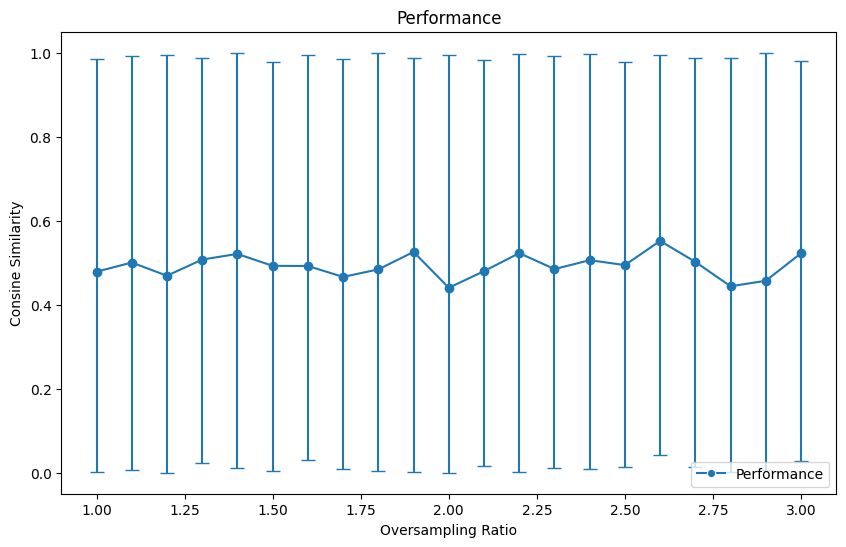

In [ ]:
plot_error_bars([df['oversampling']],[df.filter(like='test')],['Performance'])